In [1]:
#Firstly let's Import the libraries we need
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer

In [38]:
#Now, Let's Load the data set
df = pd.read_csv('C:/Users/consumer/Desktop/ARMAN/ Heatmaps/Football-Analytics-main/Mad About Sports/Data/Real Madrid vs FC Barcelona 2015-16.csv')

In [39]:
#Let's understand our dataset in brief by checking out it's first 5 rows
df.head()

,minute,second,team,playerName,type,outcomeType,x,y,endX,endY
0,0,0.0,Real Madrid,NaN,Start,Successful,0.0,0.0,NaN,NaN
1,0,0.0,Barcelona,NaN,Start,Successful,0.0,0.0,NaN,NaN
2,0,1.0,Barcelona,Neymar,Pass,Successful,49.8,51.9,51.9,50.0
3,0,2.0,Barcelona,Luis Suárez,Pass,Successful,51.9,50.0,38.1,53.4
4,0,3.0,Real Madrid,Gareth Bale,Challenge,Unsuccessful,60.3,43.0,NaN,NaN


In [40]:
dfpass = df[df['type'] == 'Pass']

In [41]:
dfpass

,minute,second,team,playerName,type,outcomeType,x,y,endX,endY
2,0,1.0,Barcelona,Neymar,Pass,Successful,49.8,51.9,51.9,50.0
3,0,2.0,Barcelona,Luis Suárez,Pass,Successful,51.9,50.0,38.1,53.4
6,0,4.0,Barcelona,Sergio Busquets,Pass,Successful,43.2,63.1,41.4,95.6
7,0,8.0,Barcelona,Jordi Alba,Pass,Successful,35.9,91.7,14.4,65.2
8,0,11.0,Barcelona,Claudio Bravo,Pass,Successful,12.5,59.3,15.5,29.4
...,...,...,...,...,...,...,...,...,...,...
1680,90,43.0,Real Madrid,Sergio Ramos,Pass,Successful,39.7,58.5,45.5,65.7
1685,91,14.0,Barcelona,Lionel Messi,Pass,Successful,65.0,27.0,67.3,33.3
1686,91,15.0,Barcelona,Sergi Roberto,Pass,Successful,67.3,33.3,64.4,24.6
1687,91,17.0,Barcelona,Lionel Messi,Pass,Unsuccessful,64.4,27.3,84.7,51.6


In [42]:
#As we only want successful passes to create a heat map, let's take only successful passes
dfpass = dfpass[dfpass['outcomeType']=='Successful']

In [43]:
dfpass

,minute,second,team,playerName,type,outcomeType,x,y,endX,endY
2,0,1.0,Barcelona,Neymar,Pass,Successful,49.8,51.9,51.9,50.0
3,0,2.0,Barcelona,Luis Suárez,Pass,Successful,51.9,50.0,38.1,53.4
6,0,4.0,Barcelona,Sergio Busquets,Pass,Successful,43.2,63.1,41.4,95.6
7,0,8.0,Barcelona,Jordi Alba,Pass,Successful,35.9,91.7,14.4,65.2
8,0,11.0,Barcelona,Claudio Bravo,Pass,Successful,12.5,59.3,15.5,29.4
...,...,...,...,...,...,...,...,...,...,...
1670,89,44.0,Real Madrid,Karim Benzema,Pass,Successful,80.4,36.7,86.8,18.8
1674,90,14.0,Barcelona,Claudio Bravo,Pass,Successful,11.6,49.9,57.1,24.0
1680,90,43.0,Real Madrid,Sergio Ramos,Pass,Successful,39.7,58.5,45.5,65.7
1685,91,14.0,Barcelona,Lionel Messi,Pass,Successful,65.0,27.0,67.3,33.3


In [47]:
#We want to study the Real Madrid Dataset, so let's take only those passes, where team is Real Madrid
dfRMpass = dfpass[dfpass['team']== 'Real Madrid']

In [48]:
dfRMpass

,minute,second,team,playerName,type,outcomeType,x,y,endX,endY
22,1,33.0,Real Madrid,Danilo,Pass,Successful,57.4,0.0,64.9,17.7
23,1,35.0,Real Madrid,Gareth Bale,Pass,Successful,64.9,17.7,61.6,16.4
24,1,36.0,Real Madrid,Karim Benzema,Pass,Successful,61.6,16.4,68.0,24.4
31,1,46.0,Real Madrid,Karim Benzema,Pass,Successful,70.6,66.7,75.6,76.1
38,1,55.0,Real Madrid,Luka Modric,Pass,Successful,64.8,59.1,54.5,42.7
...,...,...,...,...,...,...,...,...,...,...
1660,89,10.0,Real Madrid,Danilo,Pass,Successful,20.5,59.4,9.6,46.9
1668,89,29.0,Real Madrid,Keylor Navas,Pass,Successful,13.9,53.3,79.7,7.9
1669,89,39.0,Real Madrid,Cristiano Ronaldo,Pass,Successful,76.7,24.3,78.9,40.6
1670,89,44.0,Real Madrid,Karim Benzema,Pass,Successful,80.4,36.7,86.8,18.8


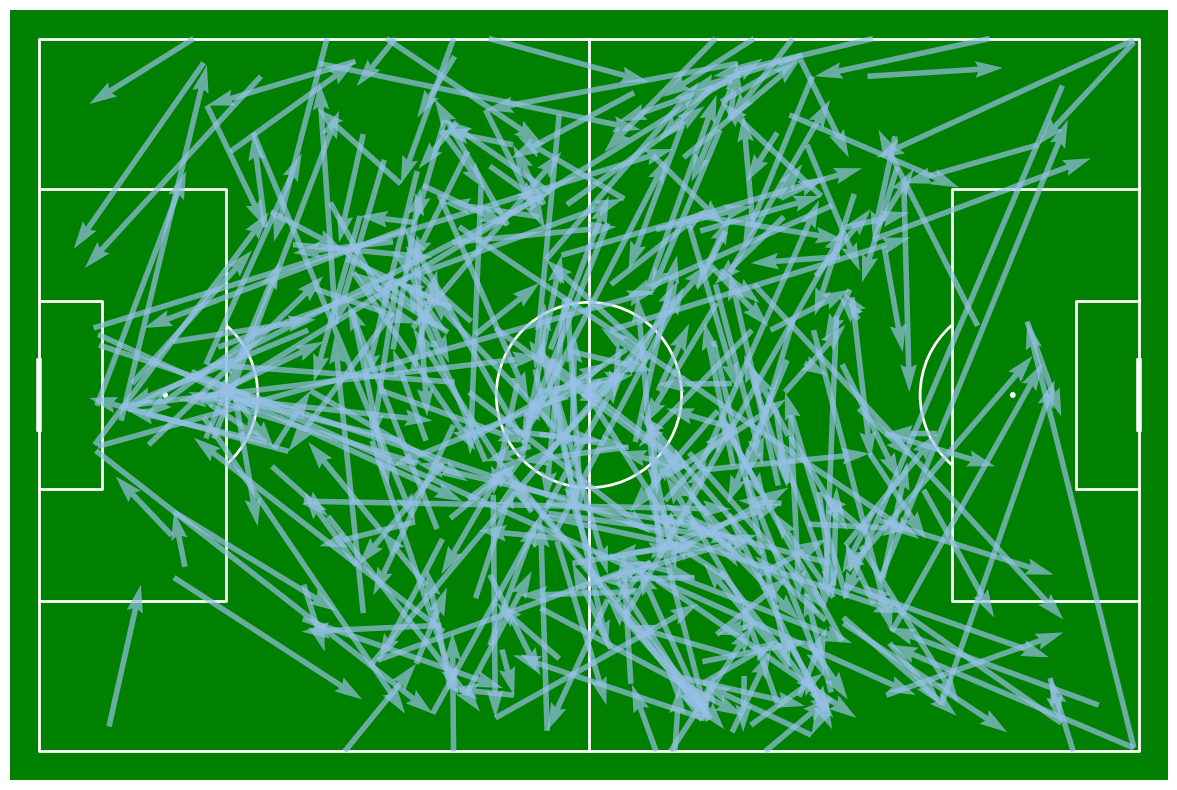

In [49]:
#Now, let's create a pass map for Real Madrid
pitch = mplsoccer.Pitch(pitch_type='opta',pitch_color='green',line_color='white')
fig,ax = pitch.draw(figsize = (14,8),)

pitch.arrows(dfRMpass['x'], dfRMpass['y'],dfMCpass['endX'],dfRMpass['endY'],color = '#97c1e7',alpha =.7, ax=ax)
plt.show()

In [58]:
#We want to study Luka Modric's Passes, therefore, We have to select only his passes

dfLMpass = dfRMpass[dfRMpass['playerName']=='Luka Modric']
dfLMpass

,minute,second,team,playerName,type,outcomeType,x,y,endX,endY
38,1,55.0,Real Madrid,Luka Modric,Pass,Successful,64.8,59.1,54.5,42.7
45,2,11.0,Real Madrid,Luka Modric,Pass,Successful,47.8,63.6,46.1,35.4
80,4,18.0,Real Madrid,Luka Modric,Pass,Successful,36.6,17.7,23.9,16.8
121,5,42.0,Real Madrid,Luka Modric,Pass,Successful,39.5,44.0,51.6,54.5
150,7,10.0,Real Madrid,Luka Modric,Pass,Successful,63.3,13.4,53.5,17.7
168,7,51.0,Real Madrid,Luka Modric,Pass,Successful,32.1,61.5,22.7,42.1
225,11,10.0,Real Madrid,Luka Modric,Pass,Successful,32.9,43.6,17.9,49.4
281,13,18.0,Real Madrid,Luka Modric,Pass,Successful,47.0,30.9,58.6,65.1
327,15,5.0,Real Madrid,Luka Modric,Pass,Successful,41.5,59.4,58.5,39.8
347,17,13.0,Real Madrid,Luka Modric,Pass,Successful,74.7,28.8,83.6,6.8


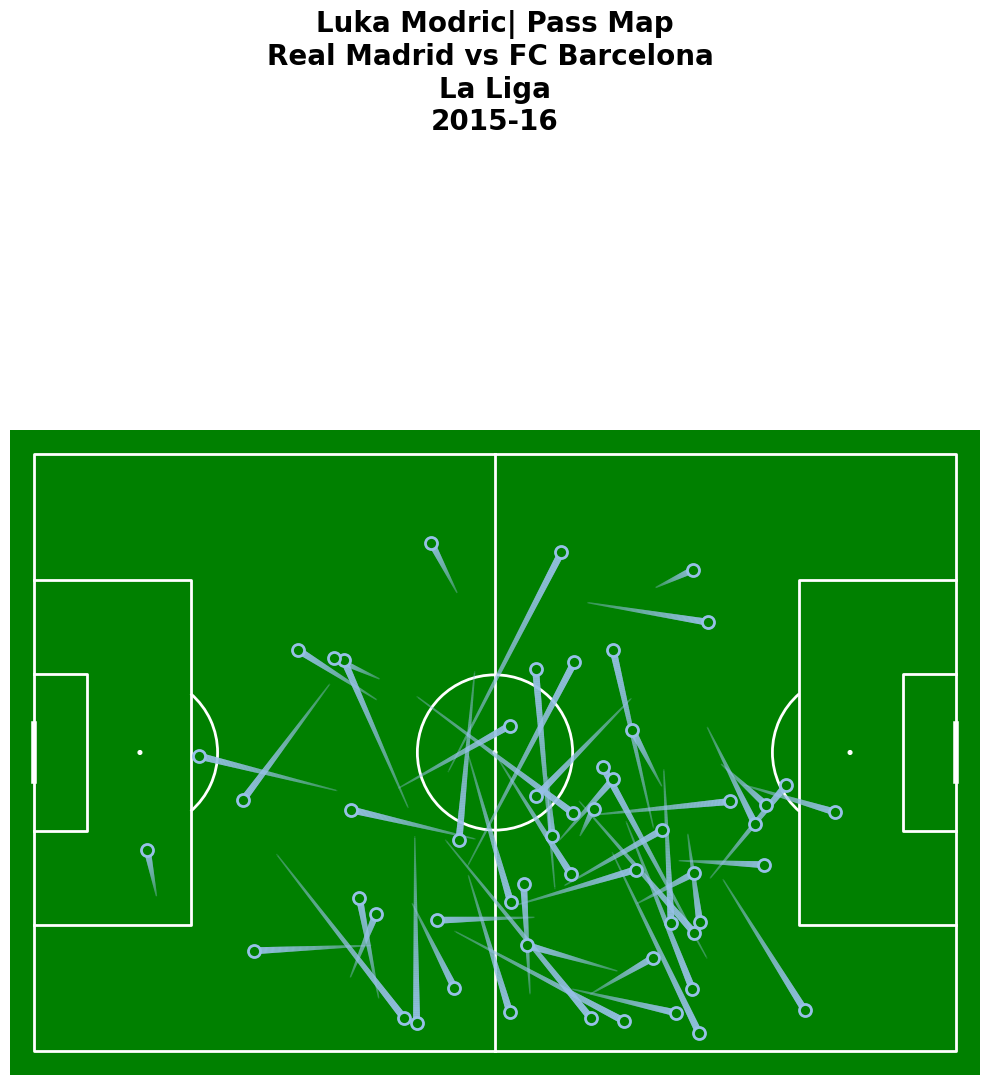

In [109]:
#Now, finally let's create a heat map of luka Modric's passes


pitch = mplsoccer.Pitch(pitch_type = 'opta',pitch_color='green',line_color='white', line_zorder = 1)
fig,ax = pitch.draw(figsize = (10,14))

pitch.lines(dfLMpass['x'],dfLMpass['y'],dfLMpass['endX'],dfLMpass['endY'], color = '#97c1e7', comet = True,
            transparent = True, alpha_start= 0.2,alpha_end = 0.8,
            zorder = 2,
            ax=ax)
pitch.scatter(dfLMpass['endX'],dfLMpass['endY'],
                color='green',edgecolor = '#97c1e7', ax=ax,
             s = 75, lw=2,zorder = 3)

fig.suptitle('Luka Modric| Pass Map\nReal Madrid vs FC Barcelona \nLa Liga\n2015-16',
            fontsize = 20, fontweight = 'bold', color = 'black')
plt.show()

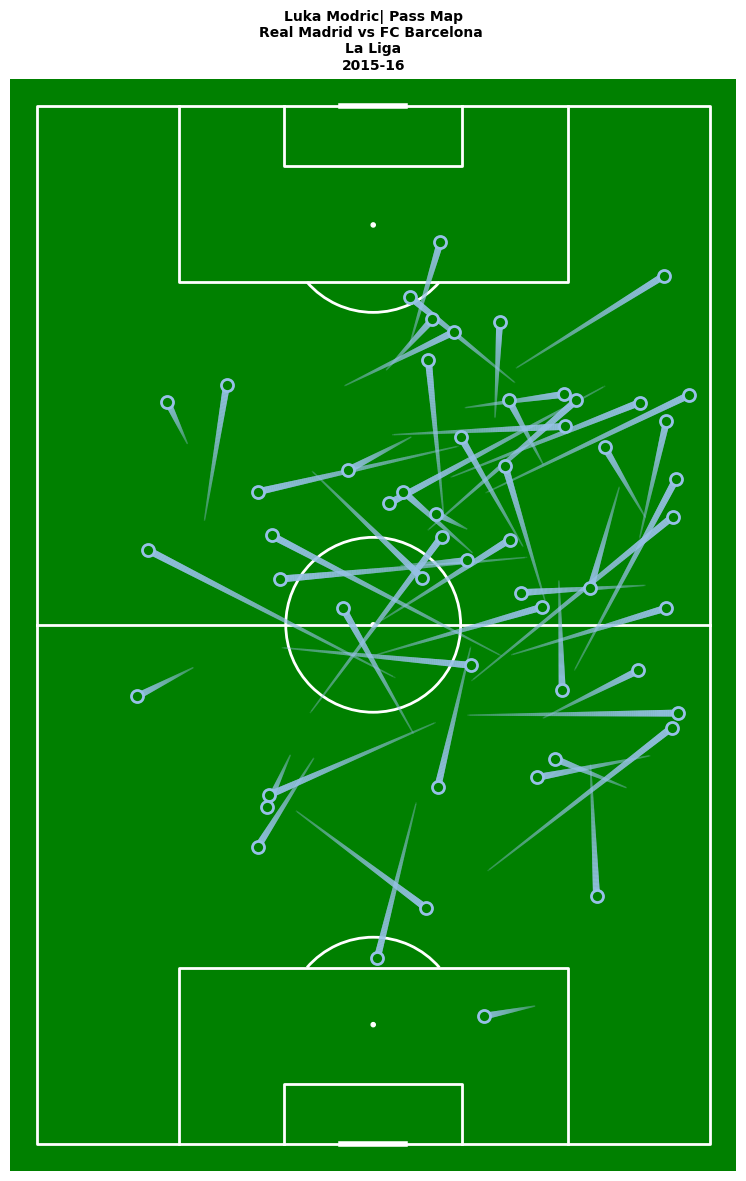

In [105]:
pitch = mplsoccer.VerticalPitch(pitch_type = 'opta',pitch_color='green',line_color='white', line_zorder = 1)
fig,ax = pitch.draw(figsize = (8,12))

pitch.lines(dfLMpass['x'],dfLMpass['y'],dfLMpass['endX'],dfLMpass['endY'], color = '#97c1e7', comet = True,
            transparent = True, alpha_start= 0.2,alpha_end = 0.8,
            zorder = 2,
            ax=ax)
pitch.scatter(dfLMpass['endX'],dfLMpass['endY'],
                color='green',edgecolor = '#97c1e7', ax=ax,
             s = 75, lw=2,zorder = 3)

fig.suptitle('Luka Modric| Pass Map\nReal Madrid vs FC Barcelona \nLa Liga\n2015-16',
            fontsize = 10, fontweight = 'bold', color = 'black')
plt.show()

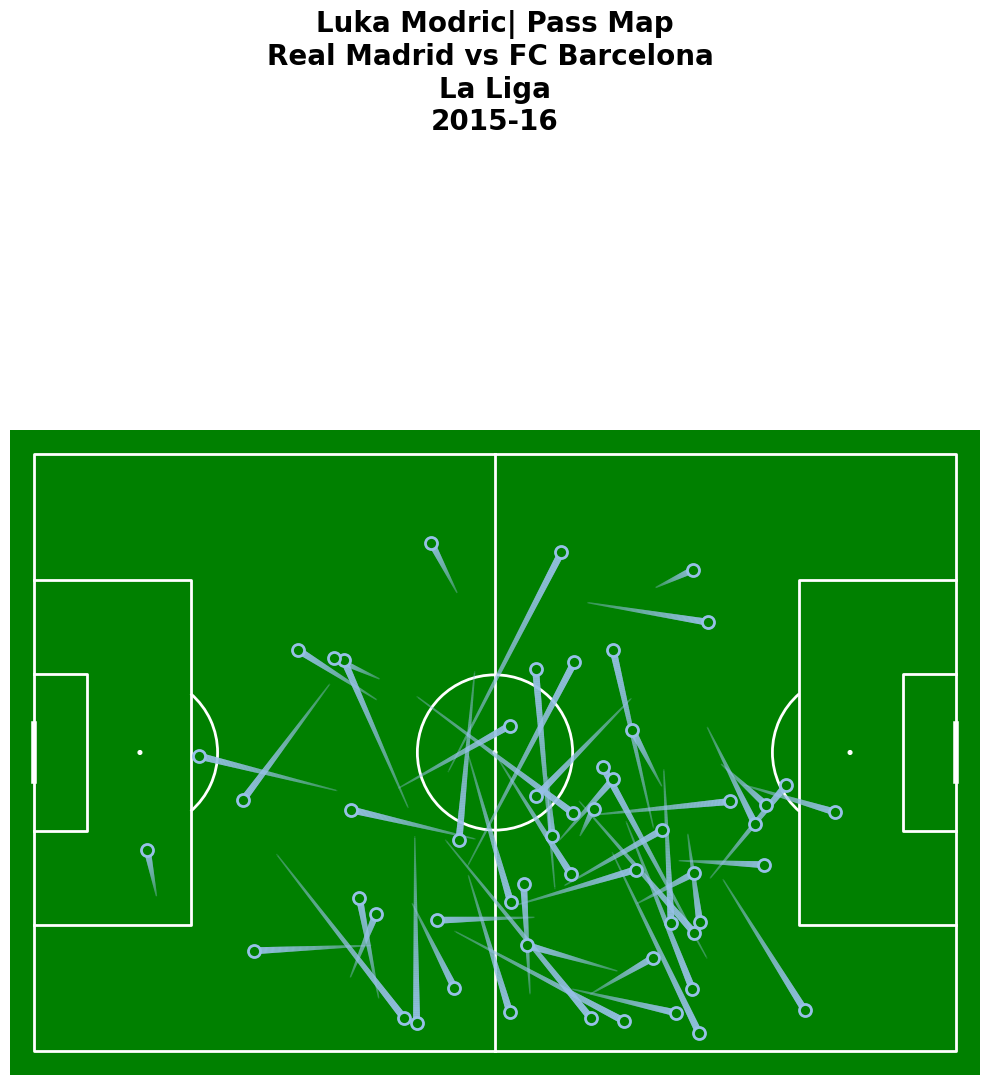

In [110]:
#Now, finally let's create a heat map of luka Modric's passes


pitch = mplsoccer.Pitch(pitch_type = 'opta',pitch_color='green',line_color='white', line_zorder = 1)
fig,ax = pitch.draw(figsize = (10,14))

pitch.lines(dfLMpass['x'],dfLMpass['y'],dfLMpass['endX'],dfLMpass['endY'], color = '#97c1e7', comet = True,
            transparent = True, alpha_start= 0.2,alpha_end = 0.8,
            zorder = 2,
            ax=ax)
pitch.scatter(dfLMpass['endX'],dfLMpass['endY'],
                color='green',edgecolor = '#97c1e7', ax=ax,
             s = 75, lw=2,zorder = 3)

fig.suptitle('Luka Modric| Pass Map\nReal Madrid vs FC Barcelona \nLa Liga\n2015-16',
            fontsize = 20, fontweight = 'bold', color = 'black')
plt.show()